<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Lecture_12_Simple_NN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Machine Learning -- A physics-agnostic, curve-fitting approach 


This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 12.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
n_input = 1
n_hidden = 1
n_out = 1
batch_size = 10
learning_rate = 0.025

hrs =     [[0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,
          2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5]]

passed =  [[0,0,0,0,0,0,1,0,1,0,
           1,0,1,0,1,1,1,1,1,1]]

x_data = torch.FloatTensor(hrs)
y_data = torch.FloatTensor(passed)

x_data = torch.transpose(x_data,0,1)
y_data = torch.transpose(y_data,0,1)




In [ ]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid())
print(model)


loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [ ]:
losses = []
for epoch in range(5000):

    pred_y = model(x_data)
    loss = loss_function(pred_y, y_data)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

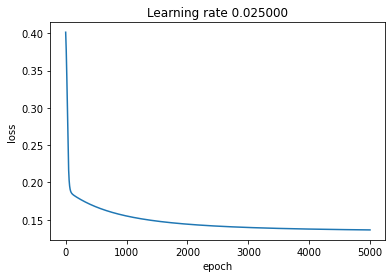

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()


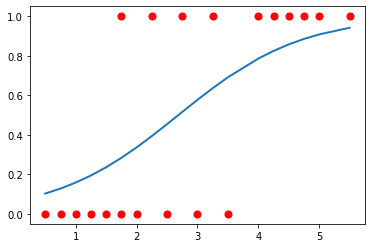

In [ ]:
y = model(x_data).detach()

plt.plot(x_data,y,linewidth=2)
plt.scatter(x_data,y_data,c='r',s=50)
plt.show()

Adopted from:

https://towardsdatascience.com/build-a-simple-neural-network-using-pytorch-38c55158028d


In [ ]:
n_input = 1
n_hidden = 2
n_out = 1
batch_size = 10
learning_rate = 0.025

hrs =     [[0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,
          2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5,5.75,
          6.0,6.25,6.5,6.75,7.0]]

passed =  [[0,0,0,0,0,0,1,0,1,0,
           1,0,1,0,1,1,1,1,1,1,0,
           1,0,0,0,0]]


x_data = torch.FloatTensor(hrs)
y_data = torch.FloatTensor(passed)

x_data = torch.transpose(x_data,0,1)
y_data = torch.transpose(y_data,0,1)


In [ ]:
model = nn.Sequential(nn.Linear(1, 2),
                      nn.Sigmoid(),
                      nn.Linear(2,1),
                      )
print(model)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)



Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
losses = []

print(x_data.shape)
for epoch in range(2000):

    for x,y in zip(x_data,y_data):
      pred_y = model(x)
      loss = loss_function(pred_y, y)
      model.zero_grad()
      loss.backward()

      optimizer.step()

    losses.append(loss.item())


torch.Size([26, 1])


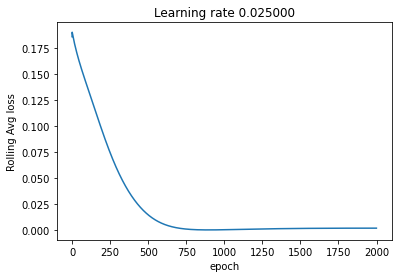

In [ ]:
plt.plot(losses)

plt.ylabel('Rolling Avg loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

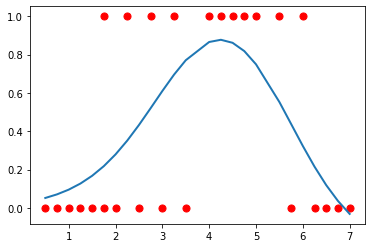

In [ ]:
y = model(x_data).detach()
plt.plot(x_data,y,linewidth=2)
plt.scatter(x_data[:,0],y_data,c='r',s=50)
plt.show()